# Proyek Analisis Data : Bike Sharing Dataset

- Nama : Noel Chrisdian
- Email : noelchrisdian@gmail.com
- ID Dicoding : noel_chrisdian

## Menentukan Daftar Pertanyaan

- Pertanyaan 1 : Berapa rata rata total penyewaan sepeda setiap harinya dalam satu minggu?

- Pertanyaan 2 : Pada hari apa dalam seminggu terjadi jumlah penyewaan sepeda tertinggi?

- Pertanyaan 3 : Apakah rata - rata total penyewaan sepeda lebih tinggi pada hari kerja atau hari libur?

- Pertanyaan 4 : Berapa jumlah maksimum penyewaan sepeda yang pernah terjadi dalam satu jam tertentu dalam sehari?

- Pertanyaan 5 : Apakah cuaca mempengaruhi dalam rata - rata total penyewaan sepeda?

- Pertanyaan 6 : Apakah terdapat perbedaan jumlah yang signifikan antara penyewa yang terdaftar (berlangganan) dengan yang tidak? Mana yang lebih banyak? 

## Library yang Dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
hourdf = pd.read_csv('./Dataset/Hour.csv')
hourdf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
daydf = pd.read_csv('./Dataset/Day.csv')
daydf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#Mengganti nama kolom agar lebih mudah dipahami
hourdf = hourdf.rename(columns= {
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'cnt' : 'total'
})
hourdf.head(len(hourdf))

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [6]:
#Mengganti nama kolom agar lebih mudah dipahami
daydf = daydf.rename(columns= {
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'cnt' : 'total' 
})
daydf.head(len(daydf))

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing & Cleaning Data

(Data dalam keadaan siap untuk dianalisis)

## Exploratory Data Analysis

Mencari rata - rata total penyewaan sepeda selama 1 minggu

In [7]:
weekdayMean = daydf.pivot_table(
    index='weekday', 
    values='total', 
    aggfunc='mean').reset_index().sort_values(by=('total'), ascending=False)

weekdayMean

,weekday,total
5,5,4690.288462
4,4,4667.259615
6,6,4550.542857
3,3,4548.538462
2,2,4510.663462
1,1,4338.123810
0,0,4228.828571


Mencari penyewaan sepeda tertinggi pada hari apa

In [8]:
weekdayMax = daydf.pivot_table(
    index='weekday', 
    values='total', 
    aggfunc='max').reset_index().sort_values(by=('total'), ascending=False)

weekdayMax

,weekday,total
6,6,8714
5,5,8362
0,0,8227
3,3,8173
4,4,7804
2,2,7767
1,1,7525


Mencari perbedaan rata - rata total penyewaan sepeda pada hari kerja atau hari libur

In [9]:
workingday = daydf.pivot_table(
    index='workingday', 
    values='total', 
    aggfunc=['mean', 'max', 'min']).reset_index()

workingday

,workingday,mean,max,min
,,total,total,total
0,0,4330.168831,8714,605
1,1,4584.820000,8362,22


Mencari jumlah maksimum total penyewaan sepeda yang terjadi dalam satu jam tertentu dalam sehari

In [10]:
hourMax = hourdf.pivot_table(
    index='hour', 
    values='total', 
    aggfunc='max').reset_index().sort_values(by='total', ascending=False)

hourMax

,hour,total
18,18,977
17,17,976
8,8,839
16,16,783
12,12,776
13,13,760
14,14,750
15,15,750
19,19,743
11,11,663


Mencari pengaruh cuaca terhadap rata - rata total penyewaan sepeda

In [11]:
weather = daydf.pivot_table(
index='weathersit', 
values='total', 
aggfunc='mean').reset_index()

weather

,weathersit,total
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


Mencari perbedaan antara penyewa yang terdaftar dengan yang tidak

In [12]:
users = daydf.pivot_table(
    index='total', 
    values=['casual', 'registered']).reset_index().sum()

users

total         3138971.0
casual         584503.0
registered    2554468.0
dtype: float64

## Visualization and Explanatory Analysis

Pertanyaan 1 : Berapa rata rata total penyewaan sepeda setiap harinya dalam satu minggu?

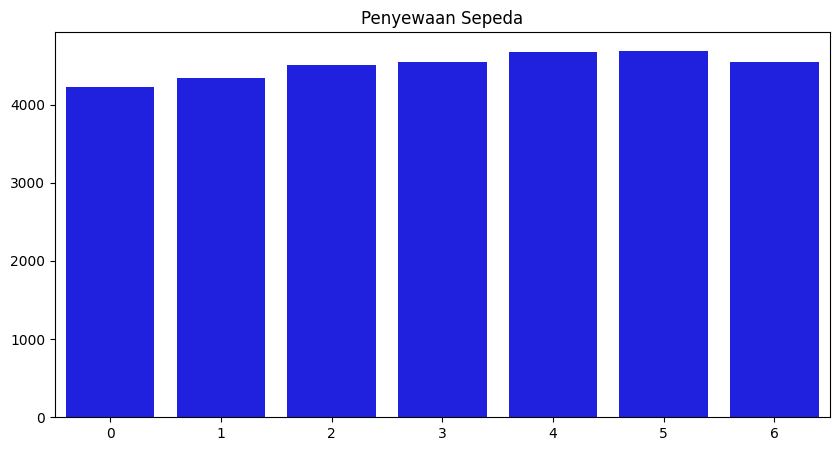

In [13]:
weekdayMean = daydf.pivot_table(
    index='weekday', 
    values='total', 
    aggfunc='mean').reset_index().sort_values(by='total', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y='total',
            x= 'weekday',
            data=weekdayMean,
            color='blue')
plt.title('Penyewaan Sepeda')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Pertanyaan 2 : Pada hari apa dalam seminggu terjadi jumlah penyewaan sepeda tertinggi?

<function matplotlib.pyplot.show(close=None, block=None)>

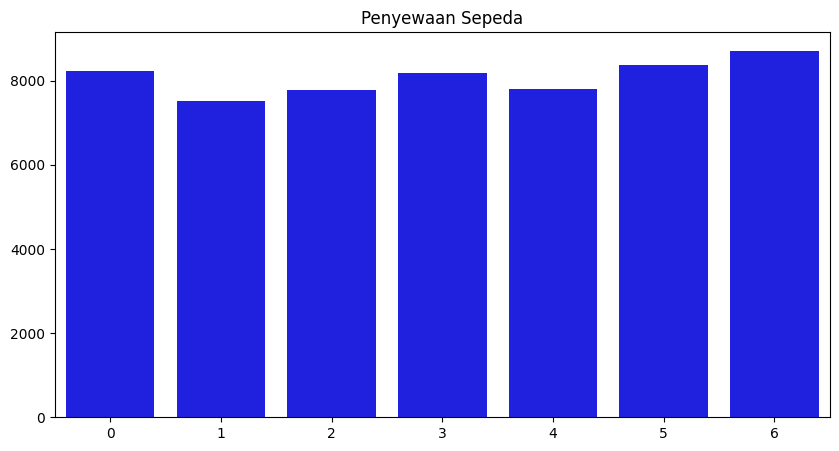

In [14]:
weekdayMax = daydf.pivot_table(
    index='weekday', 
    values='total', 
    aggfunc='max').reset_index().sort_values(by=('total'), ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y='total',
            x= 'weekday',
            data=weekdayMax.sort_values(by='total', ascending=True),
            color='blue')
plt.title('Penyewaan Sepeda')
plt.ylabel(None)
plt.xlabel(None)
plt.show

Pertanyaan 3 : Apakah rata - rata total penyewaan sepeda lebih tinggi pada hari kerja atau hari libur?

<function matplotlib.pyplot.show(close=None, block=None)>

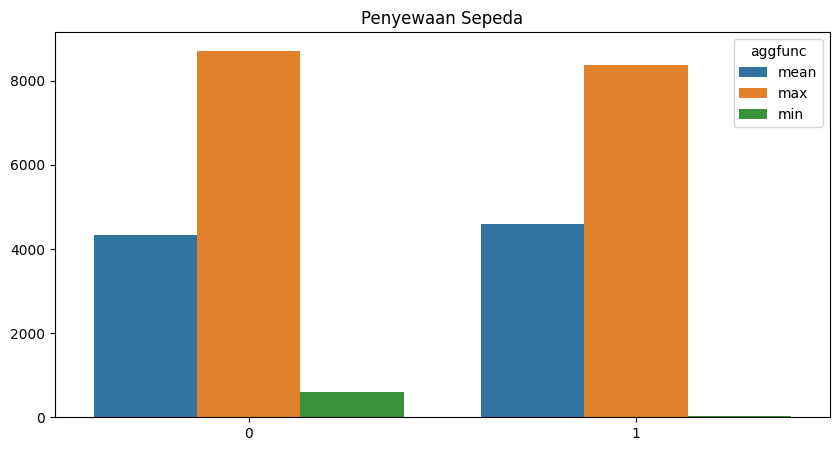

In [15]:
workingday = daydf.pivot_table(
    index='workingday', 
    values='total', 
    aggfunc=['mean', 'max', 'min']).reset_index()

workingday.columns = ['workingday', 'mean', 'max', 'min']
workingday = workingday.melt(id_vars='workingday', 
                             var_name='aggfunc',
                             value_name='total')

plt.figure(figsize=(10, 5))
sns.barplot(
    data=workingday,
    y='total',
    x='workingday',
    hue='aggfunc',
    errorbar=None)
plt.title('Penyewaan Sepeda')
plt.ylabel(None)
plt.xlabel(None)
plt.show

Pertanyaan 4 : Berapa jumlah maksimum penyewaan sepeda yang pernah terjadi dalam satu jam tertentu dalam sehari?

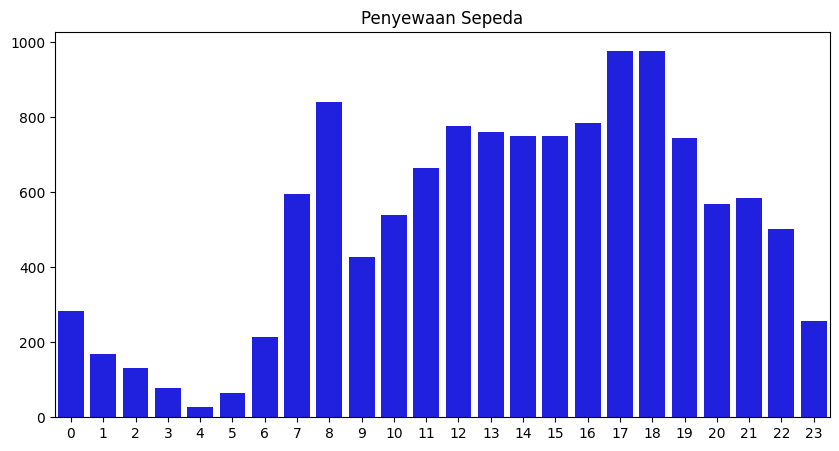

In [16]:
hourMax = hourdf.pivot_table(
    index='hour', 
    values='total', 
    aggfunc='max').reset_index().sort_values(by='total', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y='total',
            x='hour',
            data=hourMax,
            color='blue')
plt.title('Penyewaan Sepeda')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Pertanyaan 5 : Apakah cuaca mempengaruhi dalam rata - rata total penyewaan sepeda?

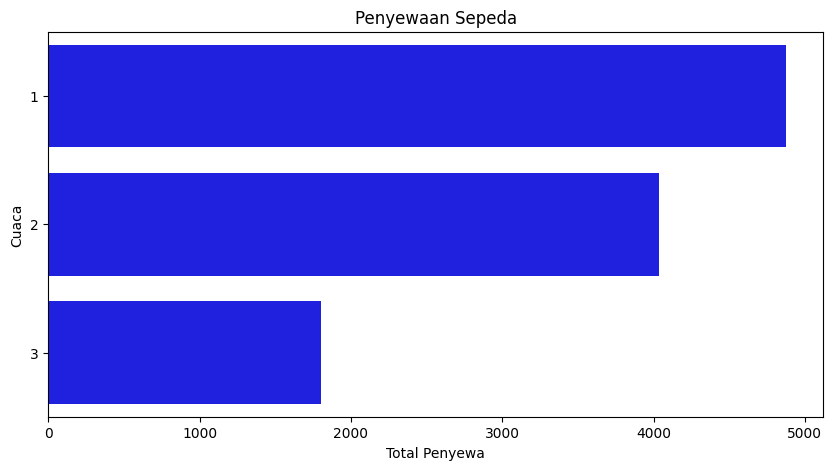

In [17]:
weather = daydf.pivot_table(index='weathersit', values='total', aggfunc='mean').reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    y='weathersit',
    x='total',
    data=weather,
    orient='h',
    color='blue')
plt.xlabel('Total Penyewa')
plt.ylabel('Cuaca')
plt.title('Penyewaan Sepeda')
plt.show()

Pertanyaan 6 : Apakah terdapat perbedaan jumlah yang signifikan antara penyewa yang terdaftar (berlangganan) dengan yang tidak? Mana yang lebih banyak? 

([<matplotlib.patches.Wedge at 0x1bad7a43bf0>,
 [Text(1.0004603627079143, 0.6626304118061203, 'Casual'),
  Text(-0.9170885765094722, -0.6074113456594552, 'Registered')],
 [Text(0.5836018782462833, 0.3865344068869035, '18.6%'),
  Text(-0.5002301326415302, -0.3313152794506119, '81.4%')])

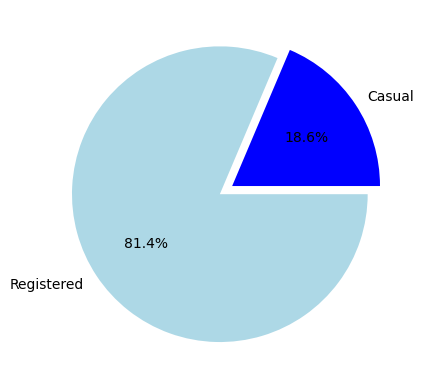

In [18]:
users = daydf.pivot_table(
    index='total', 
    values=['casual', 'registered']).reset_index()

totalCasual = users['casual'].sum()
totalRegistered = users['registered'].sum()

sizes = [totalCasual, totalRegistered]
labels = ['Casual', 'Registered']
colors = ('blue', 'lightblue')
explode = (0.1, 0)

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)

## Conclusion

- Pertanyaan 1 : Berapa rata rata total penyewaan sepeda setiap harinya dalam satu minggu?

Rata - rata total penyewaan sepeda selama 1 minggu mencapai angka 4000 -an, dengan nilai tertingginya adalah 4690 pada hari Jum'at

- Pertanyaan 2 : Pada hari apa dalam seminggu terjadi jumlah penyewaan sepeda tertinggi?

Penyewaan sepeda dengan jumlah total tertinggi berada di hari Sabtu yang dapat mencapai angka 8714

- Pertanyaan 3 : Apakah rata - rata total penyewaan sepeda lebih tinggi pada hari kerja atau hari libur?

Terdapat perbedaan rata - rata total penyewaan sepeda pada hari kerja yaitu 4584 dan hari libur yaitu 4330, yang mana di hari kerja lebih tinggi rata - ratanya

- Pertanyaan 4 : Berapa jumlah maksimum penyewaan sepeda yang pernah terjadi dalam satu jam tertentu dalam sehari?

Jumlah maksimum penyewaan sepeda yang pernah terjadi dalam satu jam dalam sehari adalah pada jam 18 dengan jumlah total 977 disusul oleh jam 17 yang hanya berjarak 1 angka yaitu 976

- Pertanyaan 5 : Apakah cuaca mempengaruhi dalam rata - rata total penyewaan sepeda?

Cuaca dapat mempengaruhi rata - rata total penyewaan sepeda, yang hasilnya adalah pada saat cerah rata - rata total penyewaan sepeda dapat mencapai angka 4876, kemudian pada kondisi berkabut dan mendung rata ratanya turun menjadi 4035, kemudian saat hujan ringan / salju dan petir rata ratanya berkurang drastis menjadi 1803

- Pertanyaan 6 : Apakah terdapat perbedaan jumlah yang signifikan antara penyewa yang terdaftar (berlangganan) dengan yang tidak? Mana yang lebih banyak? 

Terdapat perbedaan jumlah signifikan antara penyewa yang terdaftar yaitu 2554468 dan penyewa yang tidak yaitu 584503